# Clustering Analysis
by Wilson Lee

Data Set : China Mobile User Gemographics Source

Link : https://www.kaggle.com/chinapage/china-mobile-user-gemographics

## Problem Definition
This code will perform a clustering analysis of the provided user application usage.

In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

import scipy
import scipy.cluster.hierarchy as sch
import collections

sns.set_style('whitegrid')

from joblib import dump, load

## Load Data

In [2]:
wDatabaseFolder = "../../Data/Modeling/active_apps_data"

list_of_database = []
for wRoot, wDirs, wFiles in os.walk(wDatabaseFolder):
    for wFilename in wFiles:
        wCurrentFilename = os.path.join(wRoot, wFilename)
        list_of_database.append(pd.read_csv(wCurrentFilename, index_col=None))
        # Only loading the first file of the database to reduce computation cost
        break
        
df_database = pd.concat(list_of_database, axis=0, ignore_index= True)


## Preview Data

In [3]:
print(df_database.columns.to_list())
df_database.head()

['age', 'day_of_week', 'hour', '3d', '80', '90', 'abroad', 'academic', 'accommodation', 'accounting', 'action', 'activity', 'adventure', 'advice', 'advisory', 'aggregate', 'air', 'amoy', 'animation', 'answer', 'antique', 'app', 'appliance', 'application', 'area', 'around', 'art', 'asia', 'astrology', 'audiobooks', 'automotive', 'aviation', 'avoid', 'baby', 'bank', 'banking', 'based', 'basketball', 'beauty', 'behalf', 'big', 'billards', 'blog', 'bobble', 'book', 'booking', 'box', 'brokerage', 'bus', 'business', 'buy', 'calendar', 'car', 'card', 'care', 'cartoon', 'casual', 'chain', 'channel', 'checkpoint', 'chess', 'child', 'chinese', 'church', 'class', 'classical', 'clock', 'coach', 'collection', 'college', 'comfortable', 'comic', 'commodity', 'community', 'comparing', 'competitive', 'complex', 'condition', 'consumer', 'contact', 'content', 'convenience', 'cool', 'cosplay', 'cost', 'coupon', 'cozy', 'credit', 'crowdfunding', 'cultivation', 'culture', 'custom', 'customization', 'customi

,age,day_of_week,hour,3d,80,90,abroad,academic,accommodation,accounting,...,western,wifi,world,xianxia,zombie,zuma,longitude,latitude,gender_F,gender_M
0,31,0,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,114.362348,30.871515,1,0
1,31,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,114.362348,30.871515,1,0
2,31,0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,114.360000,30.870000,1,0
3,31,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,114.360000,30.870000,1,0
4,40,0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,124.888462,46.618974,0,1


## Creat Working Copy

In [4]:
df_database_working = df_database.copy()

## Feature Engineering

In [5]:
# select the columns
X_UserInfo = ['age', 'day_of_week', 'hour', "longitude", "latitude", "gender_F", "gender_M"]

# only take interest vector
X_columns = [ x for x in df_database.columns.to_list() if x not in X_UserInfo]
# normalize the data
for col in X_columns:
    df_database_working[col] = StandardScaler().fit_transform(df_database_working[col].values.reshape(-1, 1))
    
df_database_working

,age,day_of_week,hour,3d,80,90,abroad,academic,accommodation,accounting,...,western,wifi,world,xianxia,zombie,zuma,longitude,latitude,gender_F,gender_M
0,31,0,7,-0.015188,-0.008768,-0.010739,-0.0124,-0.019609,-0.027033,3.265277,...,-0.0124,-0.045605,-0.008768,-0.020566,-0.027033,0.0,114.362348,30.871515,1,0
1,31,0,8,-0.015188,-0.008768,-0.010739,-0.0124,-0.019609,-0.027033,-0.306253,...,-0.0124,-0.045605,-0.008768,-0.020566,-0.027033,0.0,114.362348,30.871515,1,0
2,31,0,10,-0.015188,-0.008768,-0.010739,-0.0124,-0.019609,-0.027033,-0.306253,...,-0.0124,-0.045605,-0.008768,-0.020566,-0.027033,0.0,114.360000,30.870000,1,0
3,31,0,20,-0.015188,-0.008768,-0.010739,-0.0124,-0.019609,-0.027033,-0.306253,...,-0.0124,-0.045605,-0.008768,-0.020566,-0.027033,0.0,114.360000,30.870000,1,0
4,40,0,7,-0.015188,-0.008768,-0.010739,-0.0124,-0.019609,-0.027033,-0.306253,...,-0.0124,-0.045605,-0.008768,-0.020566,-0.027033,0.0,124.888462,46.618974,0,1
5,40,0,13,-0.015188,-0.008768,-0.010739,-0.0124,-0.019609,-0.027033,-0.306253,...,-0.0124,-0.045605,-0.008768,-0.020566,-0.027033,0.0,124.880000,46.620000,0,1
6,53,0,5,-0.015188,-0.008768,-0.010739,-0.0124,-0.019609,-0.027033,-0.306253,...,-0.0124,-0.045605,-0.008768,-0.020566,-0.027033,0.0,110.012912,30.494667,1,0
7,45,0,13,-0.015188,-0.008768,-0.010739,-0.0124,-0.019609,-0.027033,-0.306253,...,-0.0124,-0.045605,-0.008768,-0.020566,-0.027033,0.0,110.012912,30.494667,1,0
8,34,0,14,-0.015188,-0.008768,-0.010739,-0.0124,-0.019609,-0.027033,-0.306253,...,-0.0124,-0.045605,-0.008768,-0.020566,-0.027033,0.0,110.012912,30.494667,1,0
9,33,0,5,-0.015188,-0.008768,-0.010739,-0.0124,-0.019609,-0.027033,-0.306253,...,-0.0124,-0.045605,-0.008768,-0.020566,-0.027033,0.0,110.012912,30.494667,0,1


## Model Training

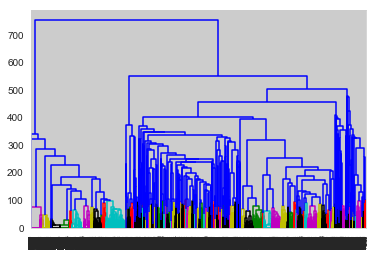

{1, 2, 3, 4, 5, 6}
Counter({3: 16131, 1: 7405, 6: 1426, 2: 1007, 5: 44, 4: 5})


,3d,80,90,abroad,academic,accommodation,accounting,action,activity,adventure,...,weibo,weight,west,western,wifi,world,xianxia,zombie,zuma,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [6]:
k = 6
color_threshold = 100
d = sch.distance.pdist(df_database_working[X_columns])
Z= sch.linkage(d, method = 'ward') # minimize within cluster variation
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()

print(set(T))
print(collections.Counter(T))

df_results = df_database[X_columns].copy()
df_results['cluster'] = T
df_results

## Load Vector Converter

In [7]:
import InterestVectorConvertor
Converter = load('InterestVectorConverter.joblib')

## Convert Clustered Interest Vector into Application Categories

In [8]:
# Analyze the centroids
df_results_Transpose = df_results.groupby('cluster').mean().round(2).T


df_Table = {}
for cluster in set(T):
    wVector = [df_results_Transpose[cluster].to_list()]
    df_Table[cluster] = Converter.convertVector(wVector)


## Merge Table Together to Compare

In [9]:
df_Compiled = df_Table[next(iter(df_Table))]
list_column = ["category-mod", "Cluster_{0}".format(next(iter(df_Table)))]
for cluster, table in df_Table.items():
    if cluster != next(iter(df_Table)):
        df_Compiled =  df_Compiled.merge(table,on='category-mod', how='outer')
        list_column.append("Cluster_{0}".format(cluster))

print(list_column)
df_Compiled.columns = list_column
df_Compiled = df_Compiled.fillna(0)
df_Compiled

['category-mod', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6']


,category-mod,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6
0,property industry new,1.72,2.04,1.95,2.0,2.02,2.02
1,property industry,1.72,2.00,1.92,2.0,2.00,2.00
2,real estate property,0.86,0.00,0.00,0.0,0.00,0.00
3,device property,0.86,0.00,0.00,0.0,0.00,0.00
4,property trust,0.86,0.00,0.00,0.0,0.00,0.00
5,intellectual property trust,0.86,1.07,0.00,0.0,0.00,0.00
6,instant message,0.82,1.54,1.58,1.6,1.90,1.62
7,personal effectiveness,0.58,0.00,0.98,1.6,1.40,1.26
8,p2p net loan,0.57,0.00,1.57,1.8,0.00,1.29
9,convenience service,0.55,0.00,1.00,0.0,0.00,0.00


### Analysis of each cluster
#### Cluster 1
This group of events focus on applications that provide a service.
#### Cluster 2
This group of events focus on applications related to pregnancy and upbring of an infant.
#### Cluster 3
This group of events focus on applications related to finance.
#### Cluster 4
This group of events focus on applications related to online shopping and traveling 
#### Cluster 5
This group of events focus on applications related to education and transportation booking
#### Cluster 6
This group of events focus on applications related low cost travelling and tourism

## Model Evaluation

In [10]:
# Inter-Cluster
centroids = []
for cluster in sorted(set(T)):
    centroids.append(df_results[df_results['cluster']==cluster][X_columns].mean().values)
distances = []
for c1 in centroids:
    for c2 in centroids:
        distances.append(euclidean_distances(c1.reshape(-1, 1), c2.reshape(-1, 1))[0][0])
print('Inter Cluster distance', np.mean(distances))

# Intra-Cluster
distances = []
for cluster in sorted(set(T)):
    df_filter = df_results[df_results['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(-1, 1), v.values.reshape(-1, 1))[0][0])
print('Intra Cluster distance', np.mean(distances))

# Inertia
distances = []
for cluster in sorted(set(T)):
    df_filter = df_results[df_results['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
print('Inertia', np.sum(distances))

Inter Cluster distance 0.00010332072820449239
Intra Cluster distance 0.0004610476033723409
Inertia 383683.46069096954


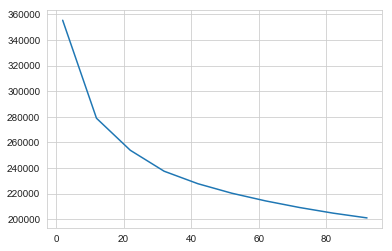

In [12]:
inertia = []
number_k = []
for k in range(2,100,10):
    d = sch.distance.pdist(df_results[X_columns])
    Z= sch.linkage(d, method = 'ward')
    T = sch.fcluster(Z, k, 'maxclust')
    df_results['cluster'] = T

    # Inertia
    distances = []
    for cluster in sorted(set(T)):
        df_filter = df_results[df_results['cluster']==cluster]
        centroid = df_filter[X_columns].mean().values
        for _, v in df_filter[X_columns].iterrows():
            distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
    inertia.append(np.sum(distances))
    number_k.append(k)
plt.plot(number_k, inertia)
plt.show()